In [229]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
REPO_LOC = "/content/drive/MyDrive/Trajectories/rhexis-trajectory"
DATA_LOC = "/content/drive/MyDrive/Trajectories/datasets/Dataset_1000"

In [231]:
import sys
sys.path.insert(0,f"{REPO_LOC}/Feature_Extraction")
sys.path.insert(0,f"{REPO_LOC}/Semantic_Segmentation")

In [232]:
import label_feature_extraction as lfe
import segmentation_access_functions as saf

In [233]:
# get pixel labels
label_dict = saf.get_labels(task = 2)

# print label options
for item in label_dict.items():
  print(f"{item[0]} : {item[1]}")

0 : Pupil
1 : Surgical Tape
2 : Hand
3 : Eye Retractors
4 : Iris
5 : Skin
6 : Cornea
7 : Cannula
8 : Cap. Cystotome
9 : Tissue Forceps
10 : Primary Knife
11 : Ph. Handpiece
12 : Lens Injector
13 : I/A Handpiece
14 : Secondary Knife
15 : Micromanipulator
16 : Cap. Forceps
255 : Ignore


In [234]:
# Read in an image file and a label file
file_substring = "CataractCoach8_610"

image = saf.get_image_from_image_filename(file_substring, DATA_LOC)
label = saf.get_label_from_image_filename(file_substring, DATA_LOC)

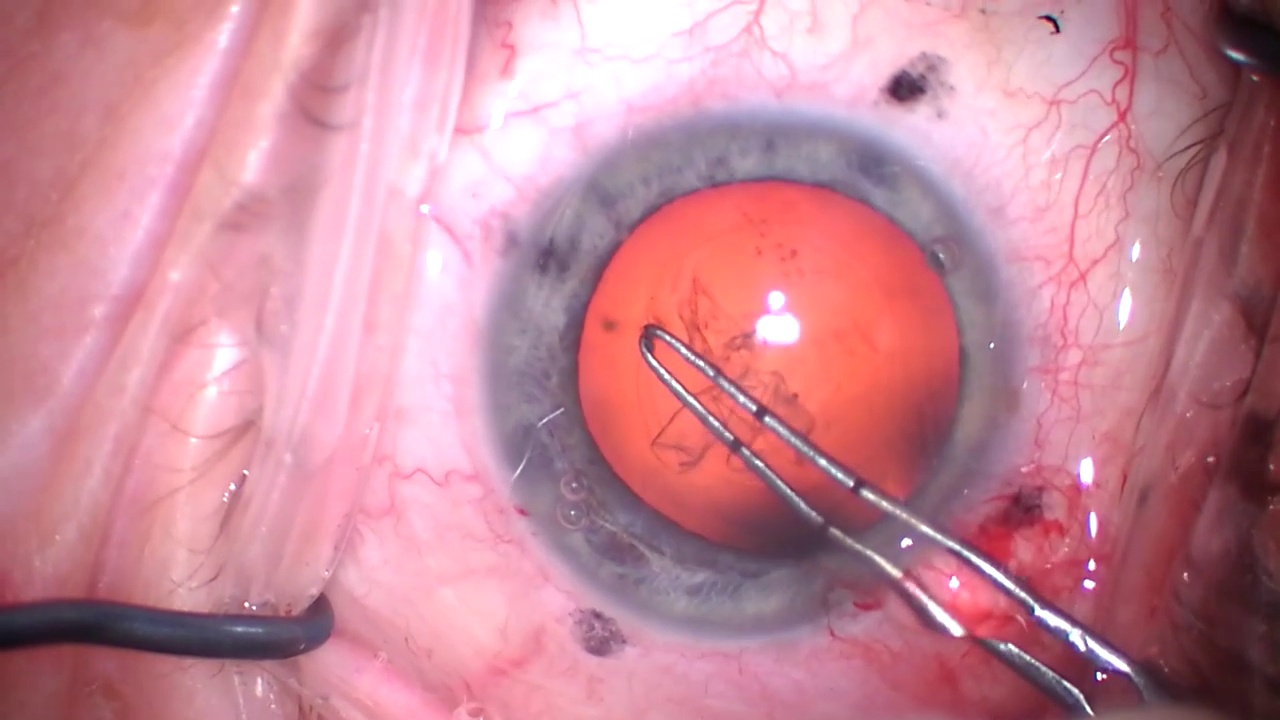

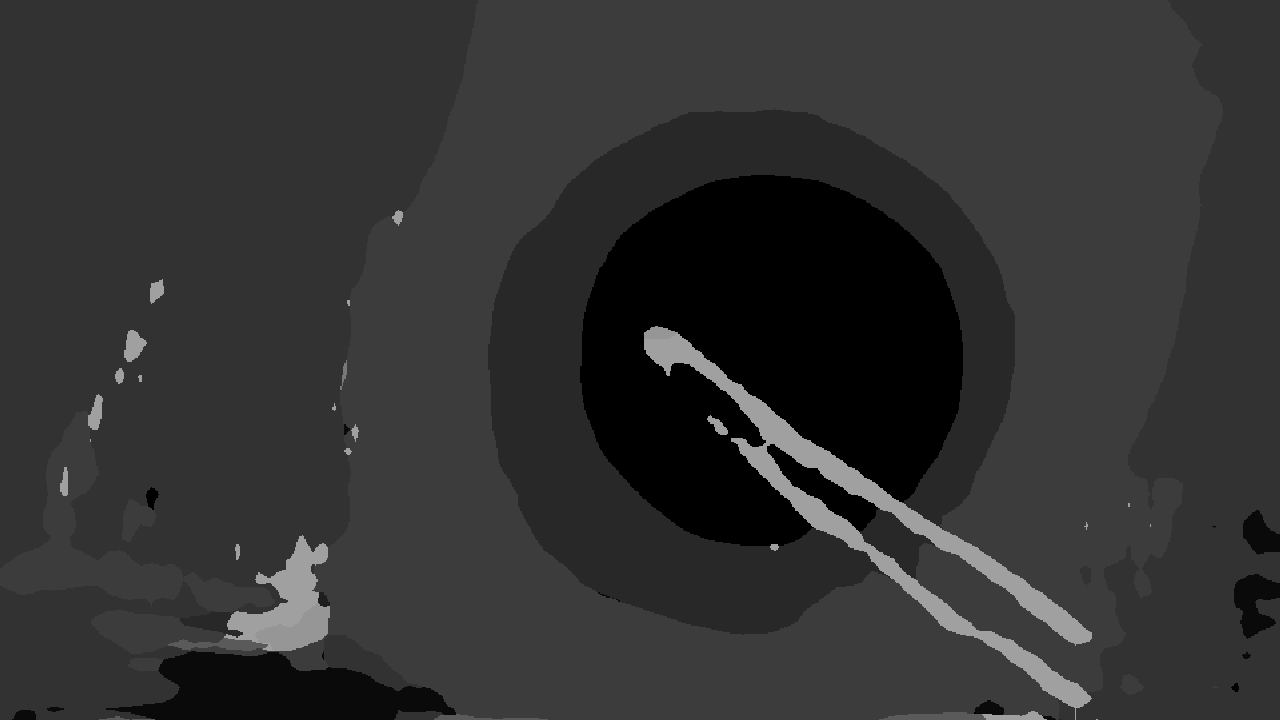

In [235]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2_imshow(label*10)

# Median Pupil Position

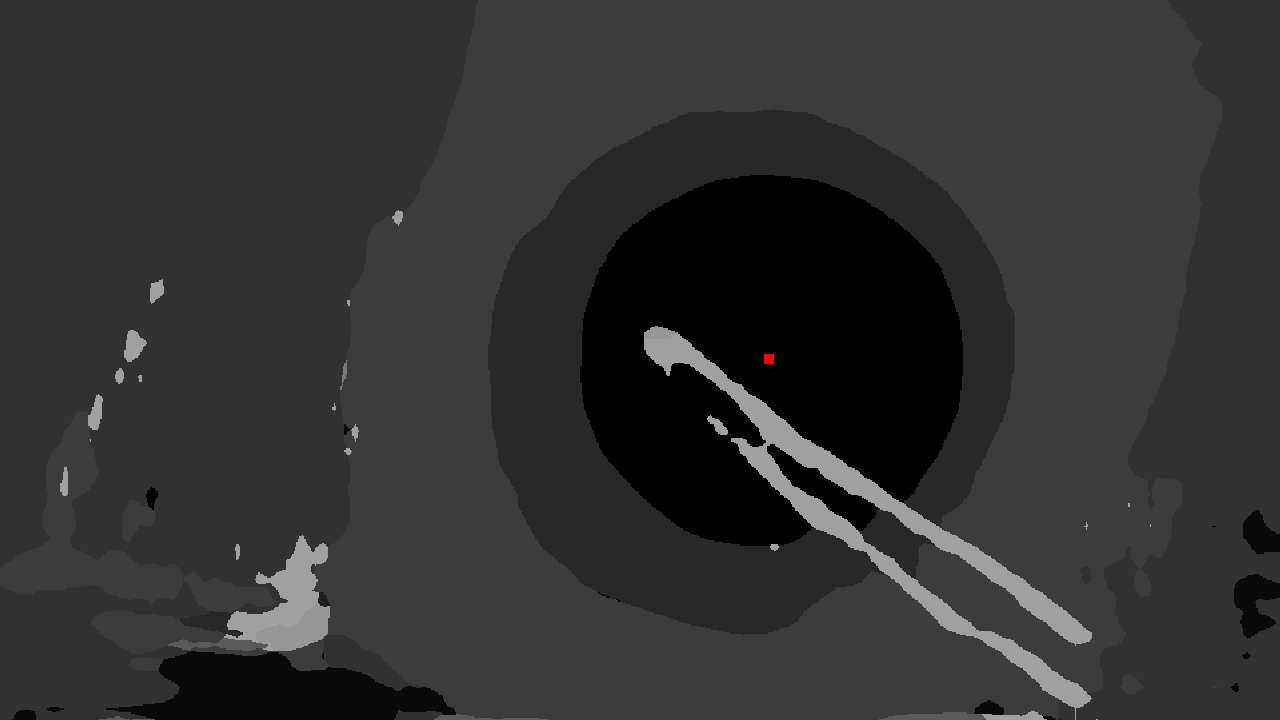

In [236]:
import cv2
import numpy as np
pos = lfe.extract_pupil_median_pos(label, label_dict)

lfe.display_dot_on_pos(label, pos)


#Pupil X and Y extents

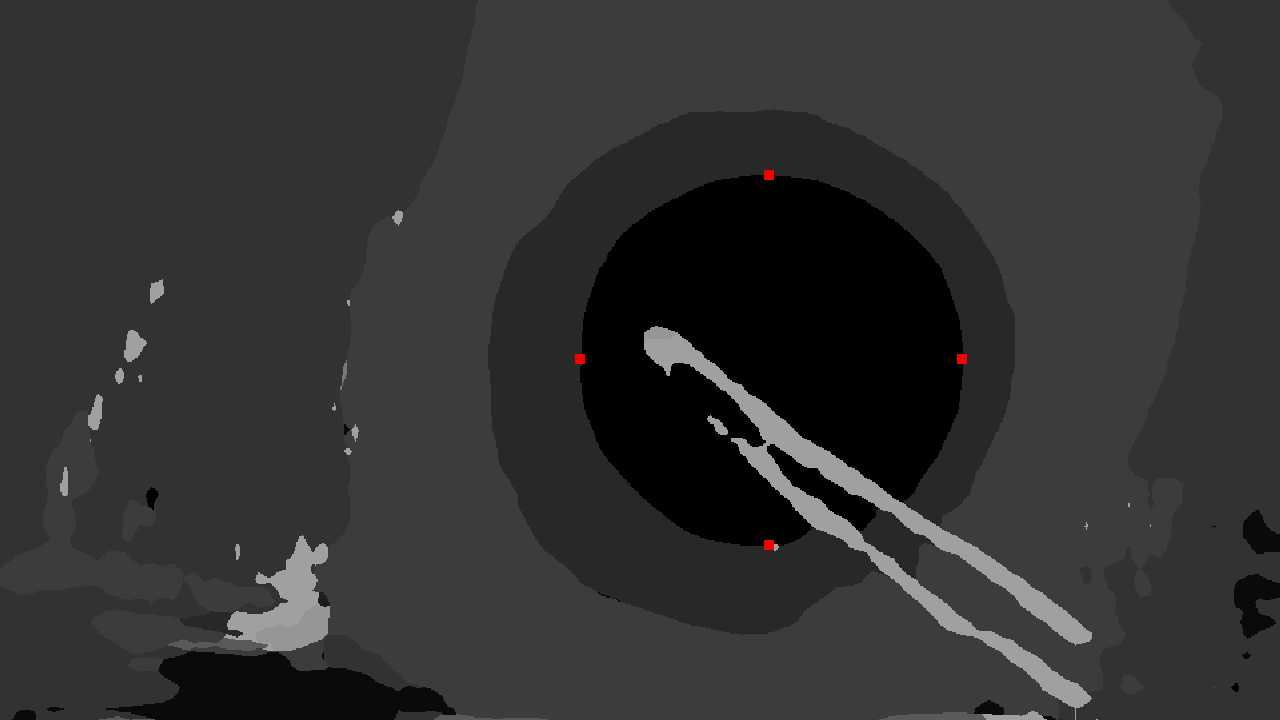

In [237]:
extents = lfe.extract_pupil_extents(label, label_dict)

lfe.display_dot_on_pos(label, extents)

# Incision position

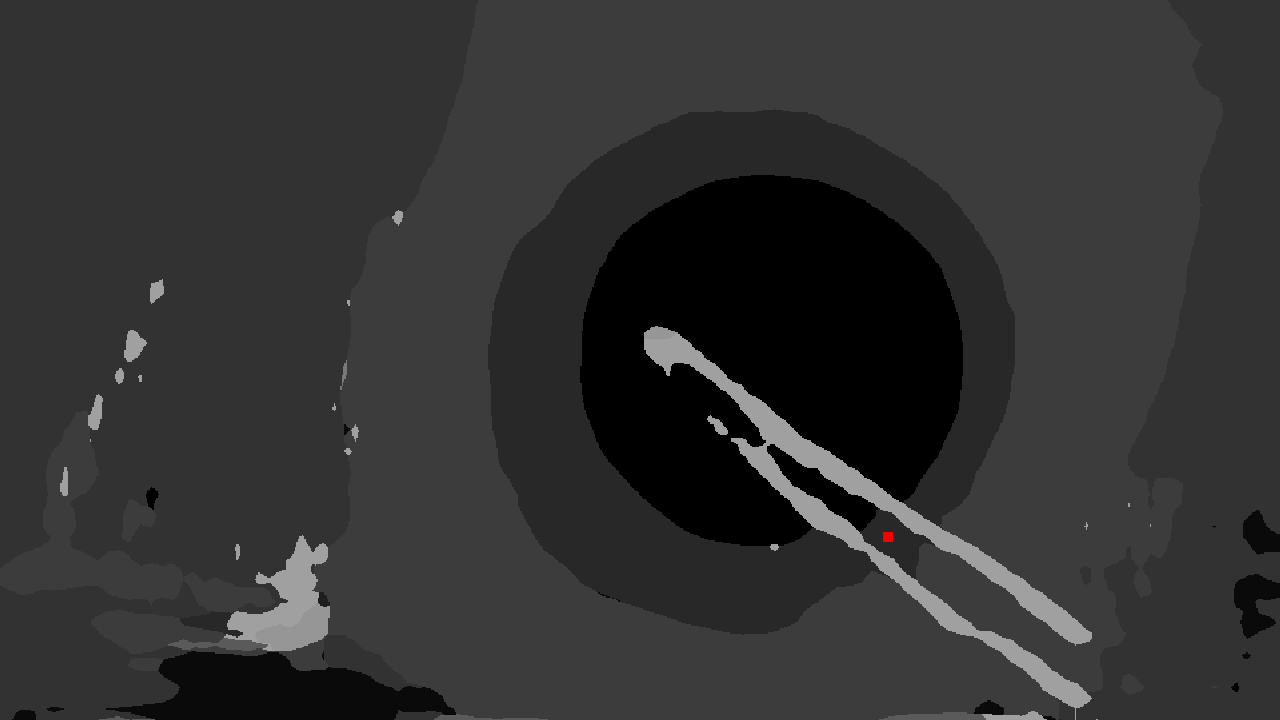

In [242]:
pos = lfe.extract_incision_position(label, label_dict)
lfe.display_dot_on_pos(label, pos)